In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santhoshrajesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("/Users/santhoshrajesh/Desktop/Datasets/chatgpt_tweets.csv",index_col=0)
data

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,chatgpt is being disassembled until it can onl...,bad
219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [3]:
data['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [4]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [5]:
sample = stratified_sample_df(data, 'labels', 10000)
sample.reset_index(inplace = True)

In [6]:
sample

,index,tweets,labels
0,208371,ChatGPT answered this question 👇 https://t.co/...,bad
1,42620,ChatGPT hitting 1 million+ users in 5 days is ...,bad
2,215617,The ChatGPT / GPT-3 token limit is the biggest...,bad
3,129391,Chatgpt is down https://t.co/Mwu7LuFF3E,bad
4,177480,"My research on ""vestibules"" as a master metaph...",bad
...,...,...,...
29995,78321,ChatGPT is crazy good.,neutral
29996,77322,ChatGPT&gt;GoogleScholar,neutral
29997,91513,Your only complaint here seems to be the impac...,neutral
29998,76594,ChatGpt plus Tailwind is way too powerful 🚀,neutral


In [7]:
sample['labels'].value_counts()

bad        10000
good       10000
neutral    10000
Name: labels, dtype: int64

In [8]:
sample.isnull().sum()

index     0
tweets    0
labels    0
dtype: int64

In [9]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(sample)):
    qn = re.sub(r'[^a-zA-Z0-9]', ' ', str(sample['tweets'][i]))
    qn = qn.lower()
    qn = qn.split()

    qn = [lemmatizer.lemmatize(word) for word in qn if word not in stopwords.words('english')]
    qn = ' '.join(qn)
    corpus.append(qn)

In [10]:
corpus

['chatgpt answered question http co rjvoggim7h http co bd6unlihqg',
 'chatgpt hitting 1 million user 5 day absolutely absurd',
 'chatgpt gpt 3 token limit biggest limiting factor atm imo n ni trying retain context really long form transcript doc etc rapidly test prompt query text critical contextual information throughout n nchunked summary enough',
 'chatgpt http co mwu7luff3e',
 'research vestibule master metaphor last april 2021 able use chatgpt pick associated vestibule putting various post made time found 17 http co 6wgx3rdvrz',
 'access chatgpt would written shorter letter http co aco8xfqpkx',
 'chatgpt new rival arrived http co p8lg1txck7',
 'make youtube video using chatgpt generative ai http co rq8pmc3mnm via youtube',
 'http co efytohke4t n nchatgpt eth grab en ensdomains en chatgpt chat gpt',
 'chatgpt machine learning model trained large dataset text data dataset used teach relationship word concept generate text coherent relevant input receive',
 'expecting much chatgpt mi

In [11]:
bog = CountVectorizer()
x = bog.fit_transform(corpus).toarray()

y = sample['labels']

In [12]:
le = LabelEncoder()
y_encode = le.fit_transform(y) 
y_encode
print(le.classes_)

['bad' 'good' 'neutral']


In [32]:
y_encode

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encode, test_size = 0.3, random_state = 42)

In [14]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [15]:
labels = le.classes_
labels

array(['bad', 'good', 'neutral'], dtype=object)

0.7214444444444444
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      3008
           1       0.80      0.61      0.69      2998
           2       0.61      0.69      0.65      2994

    accuracy                           0.72      9000
   macro avg       0.73      0.72      0.72      9000
weighted avg       0.73      0.72      0.72      9000



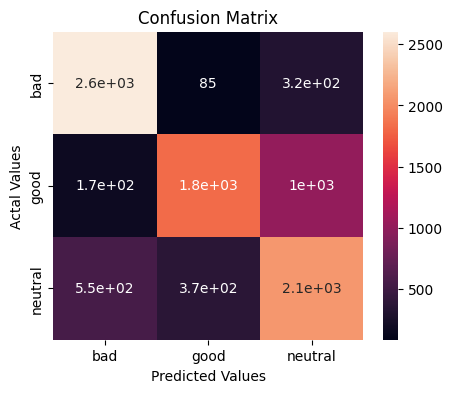

In [22]:
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns = labels, index = labels)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
import numpy as np

def clean_data(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    text = text.split()

    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

def predict_user_input(tweet):
    cleaned_data = clean_data(tweet)
    x = bog.transform([cleaned_data]).toarray()
    predicted_labels = model.predict(x)
    res =  le.classes_[predicted_labels]

    return res

In [42]:
result = predict_user_input('chatgpt is awesome')
print(result)

['good']


In [43]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [44]:
scaler_out = open("scaler.pkl","wb")
pickle.dump(bog, scaler_out)
scaler_out.close()

In [45]:
le_out = open("le.pkl","wb")
pickle.dump(le, le_out)
le_out.close()